<a href="https://colab.research.google.com/github/Rogerio-mack/IA_2025S1/blob/main/AI_TF_ImageClassifier_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classificação de Imagens com VGG16**

Acesse: https://www.tensorflow.org/api_docs/python/tf/keras/applications/

In [20]:
import tensorflow as tf
from tensorflow.keras import layers, models, Sequential
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import time

start_time = time.time()

In [12]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [13]:
# Baixar e extrair o dataset de flores
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

# Parâmetros de configuração
batch_size = 32
img_height = 180
img_width = 180

In [14]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  '/root/.keras/datasets/flower_photos/flower_photos',
  labels='inferred',  # Automatically infer labels from subdirectory names
  label_mode='categorical', # Use categorical labels (one-hot encoded)
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(224, 224), # resize for VGG16
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  '/root/.keras/datasets/flower_photos/flower_photos',
  labels='inferred',  # Automatically infer labels from subdirectory names
  label_mode='categorical', # Use categorical labels (one-hot encoded)
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(224, 224), # resize for VGG16
  batch_size=batch_size)

# Verificar o formato dos dados para diagnóstico
for images, labels in train_ds.take(1):
    print("Imagens shape:", images.shape)
    print("Labels shape:", labels.shape)
    print("Exemplo de labels:", labels[:5].numpy())

# Obter os nomes das classes
class_names = train_ds.class_names
print("Nomes das classes:", class_names)
num_classes = len(class_names)

# Otimizar o desempenho do dataset
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.
Imagens shape: (32, 224, 224, 3)
Labels shape: (32, 5)
Exemplo de labels: [[0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]]
Nomes das classes: ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [15]:
for layer in base_model.layers:
    layer.trainable = False

In [16]:
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))


In [17]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
model.summary()

# Treinar o modelo
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,138,757 (80.64 MB)

 Trainable params: 6,424,069 (24.51 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 2198s 24s/step - accuracy: 0.6384 - loss: 15.3885 - val_accuracy: 0.8011 - val_loss: 1.5166
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 2185s 24s/step - accuracy: 0.9258 - loss: 0.3995 - val_accuracy: 0.8174 - val_loss: 1.3602
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 2191s 24s/step - accuracy: 0.9758 - loss: 0.0989 - val_accuracy: 0.8243 - val_loss: 1.2127
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 2242s 24s/step - accuracy: 0.9874 - loss: 0.0398 - val_accuracy: 0.8256 - val_loss: 1.4650
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 2244s 24s/step - accuracy: 0.9910 - loss: 0.0425 - val_accuracy: 0.8229 - val_loss: 1.4770
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 2199s 24s/step - accuracy: 0.9901 - loss: 0.0343 - val_accuracy: 0.8365 - val_loss: 1.4949
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 2208s 24s/step - accuracy: 0.9960 - loss: 0.0103 - val_accuracy: 0.8311 - val_loss: 1.6479
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 2197s 24s/step - accuracy: 0.9979 - loss: 0.0094 - val_acc

23/23 ━━━━━━━━━━━━━━━━━━━━ 436s 19s/step - accuracy: 0.8150 - loss: 1.4803
Acurácia no conjunto de validação: 0.8283
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step


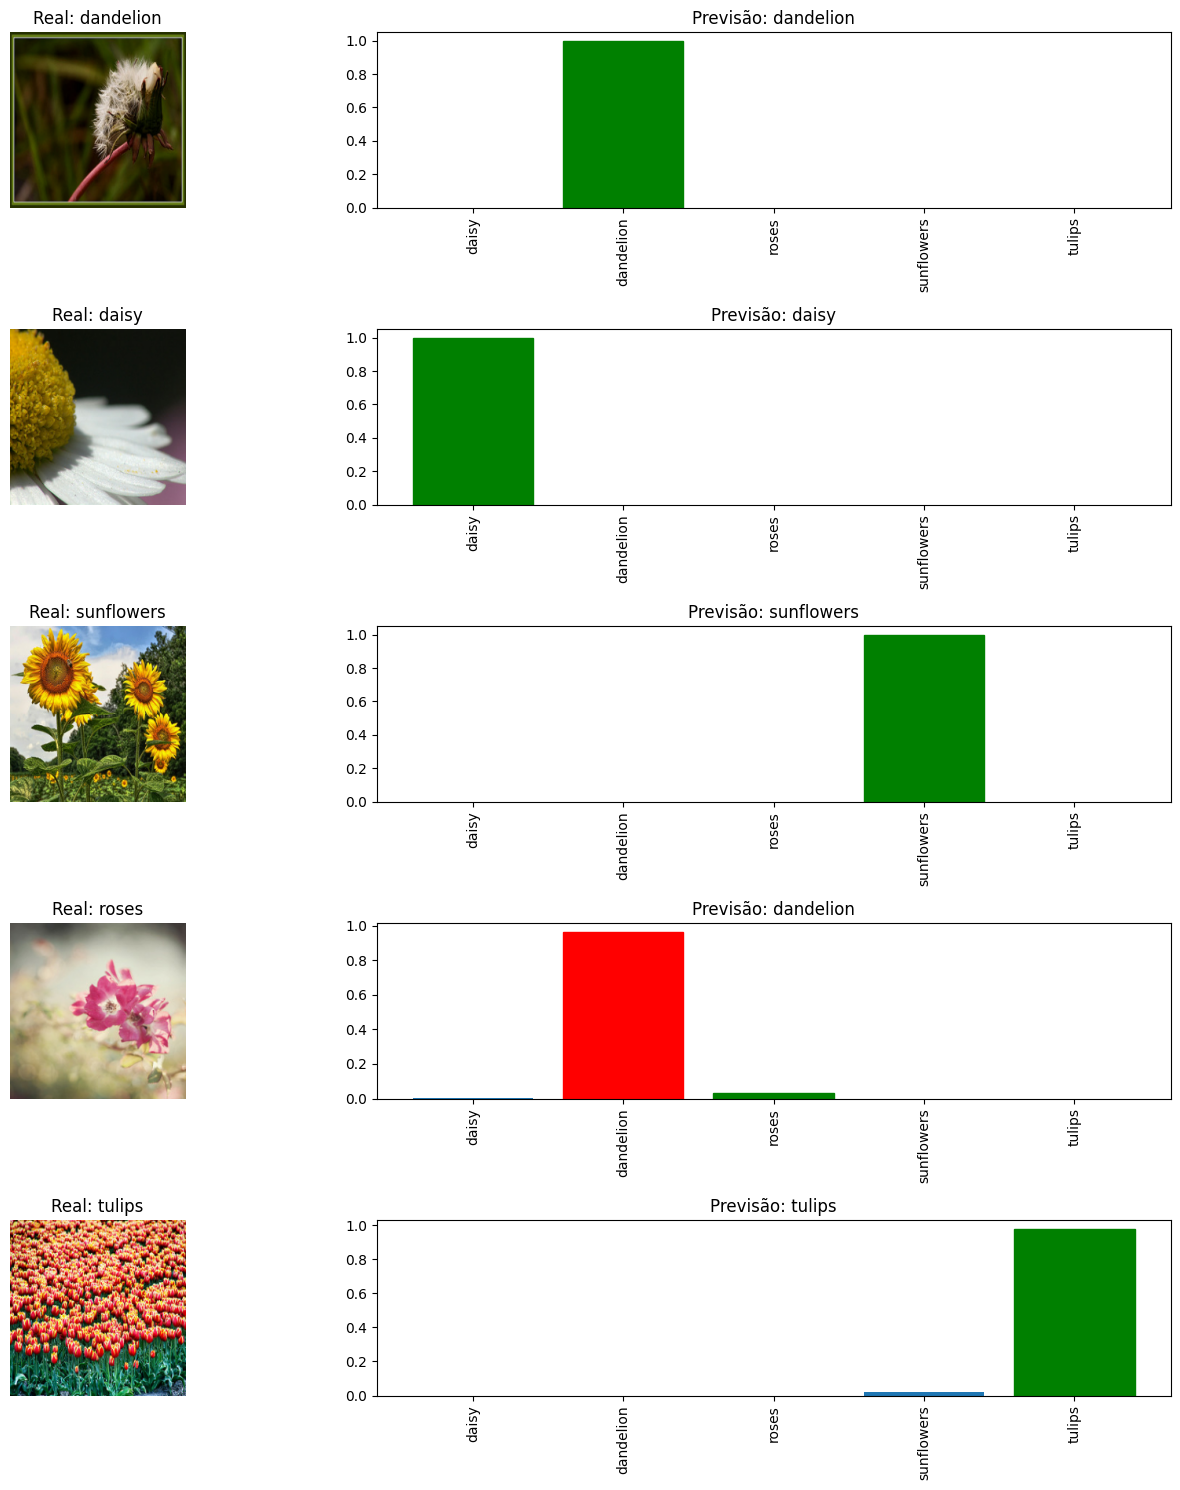

Modelo salvo como 'flower_classifier_categorical.h5'


In [21]:
# Plotar a acurácia e perda durante o treinamento
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Acurácia de Treinamento')
plt.plot(epochs_range, val_acc, label='Acurácia de Validação')
plt.legend(loc='lower right')
plt.title('Acurácia de Treinamento e Validação')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Perda de Treinamento')
plt.plot(epochs_range, val_loss, label='Perda de Validação')
plt.legend(loc='upper right')
plt.title('Perda de Treinamento e Validação')
plt.show()

# Avaliar o modelo
evaluation = model.evaluate(val_ds)
print(f"Acurácia no conjunto de validação: {evaluation[1]:.4f}")

# Função para fazer previsões e visualizá-las
def visualize_predictions(model, dataset, class_names, num_images=5):
    plt.figure(figsize=(15, 3*num_images))

    i = 0
    for images, labels in dataset.take(1):
        for j in range(min(num_images, len(images))):
            # Fazer a previsão
            img = tf.expand_dims(images[j], 0)
            predictions = model.predict(img)
            predicted_class = np.argmax(predictions[0])
            actual_class = np.argmax(labels[j])

            # Plotar a imagem
            plt.subplot(num_images, 2, i*2 + 1)
            plt.imshow(images[j].numpy().astype('uint8'))
            plt.title(f"Real: {class_names[actual_class]}")
            plt.axis('off')

            # Plotar as probabilidades
            plt.subplot(num_images, 2, i*2 + 2)
            barlist = plt.bar(range(len(class_names)), predictions[0])
            barlist[predicted_class].set_color('red')
            barlist[actual_class].set_color('green')
            plt.xticks(range(len(class_names)), class_names, rotation=90)
            plt.title(f"Previsão: {class_names[predicted_class]}")

            i += 1
            if i >= num_images:
                break

    plt.tight_layout()
    plt.show()

# Visualizar algumas previsões
visualize_predictions(model, val_ds, class_names)

# Salvar o modelo
model.save('flower_classifier_categorical.h5')
print("Modelo salvo como 'flower_classifier_categorical.h5'")

In [22]:
end_time = time.time()

elapsed_time = end_time - start_time
print(f"Training time: {elapsed_time:.2f} seconds")

Training time: 24078.11 seconds
